**Basic Image Classification**

In [34]:
#https://www.tensorflow.org/tutorials/keras/classification
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


In [35]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
train_images.shape

(60000, 28, 28)

In [38]:
len(train_labels)

60000

In [39]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [40]:
test_images.shape

(10000, 28, 28)

In [41]:
len(test_labels)

10000

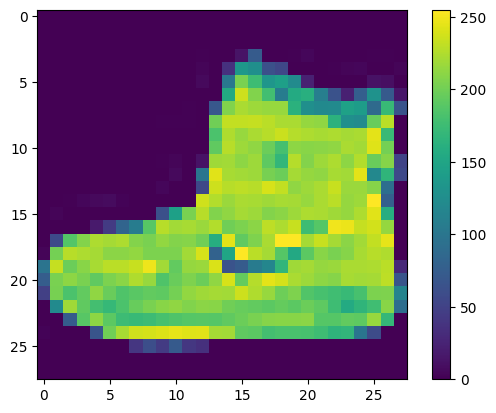

In [42]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [43]:
train_images = train_images / 255.0

test_images = test_images / 255.0

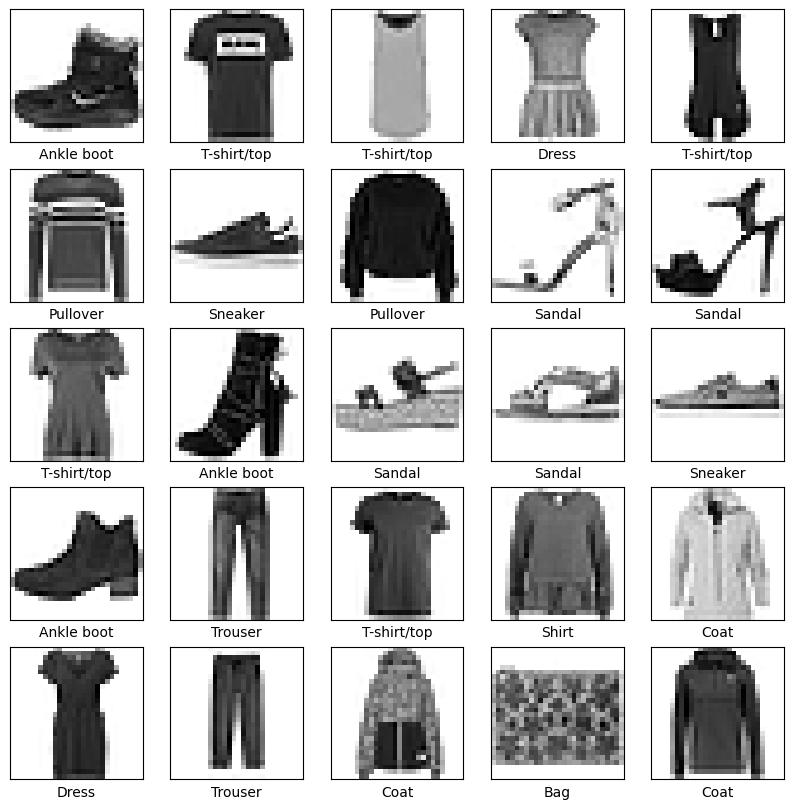

In [44]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4991 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3114 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2810 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2687 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2568 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2481 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [48]:
model.evaluate(test_images,  test_labels, verbose=2) #accuracy on test data is lesser than that on train data which means model is overfitting

313/313 - 1s - loss: 0.3289 - accuracy: 0.8839 - 563ms/epoch - 2ms/step


[0.3288990259170532, 0.883899986743927]

In [49]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [50]:
predictions = probability_model.predict(test_images)
predictions[0] #confidence that the [0]th prediction belongs to each class

313/313 [==============================] - 0s 1ms/step


array([4.0918913e-10, 6.9341359e-09, 3.4813266e-09, 3.8484472e-12,
       2.3122515e-10, 4.5291414e-03, 3.1863429e-10, 9.9499533e-03,
       3.4961654e-09, 9.8552090e-01], dtype=float32)

In [51]:
np.argmax(predictions[0]) #the class the model is most confident that the image belongs to (we can see from the last output as well)

9

In [52]:
test_labels[0] # we can see that the model predicted correctly since the pre-assigned label for the image is same as the predicted label

9

In [64]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.1f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777") #default colour of bars set to a grayish colour 
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

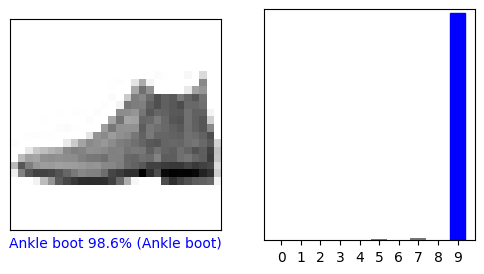

In [63]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

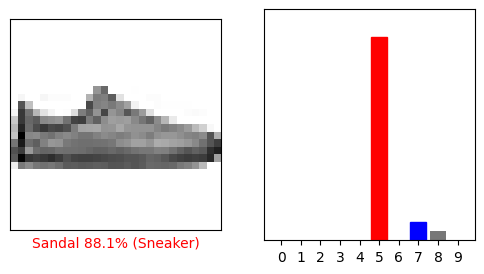

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

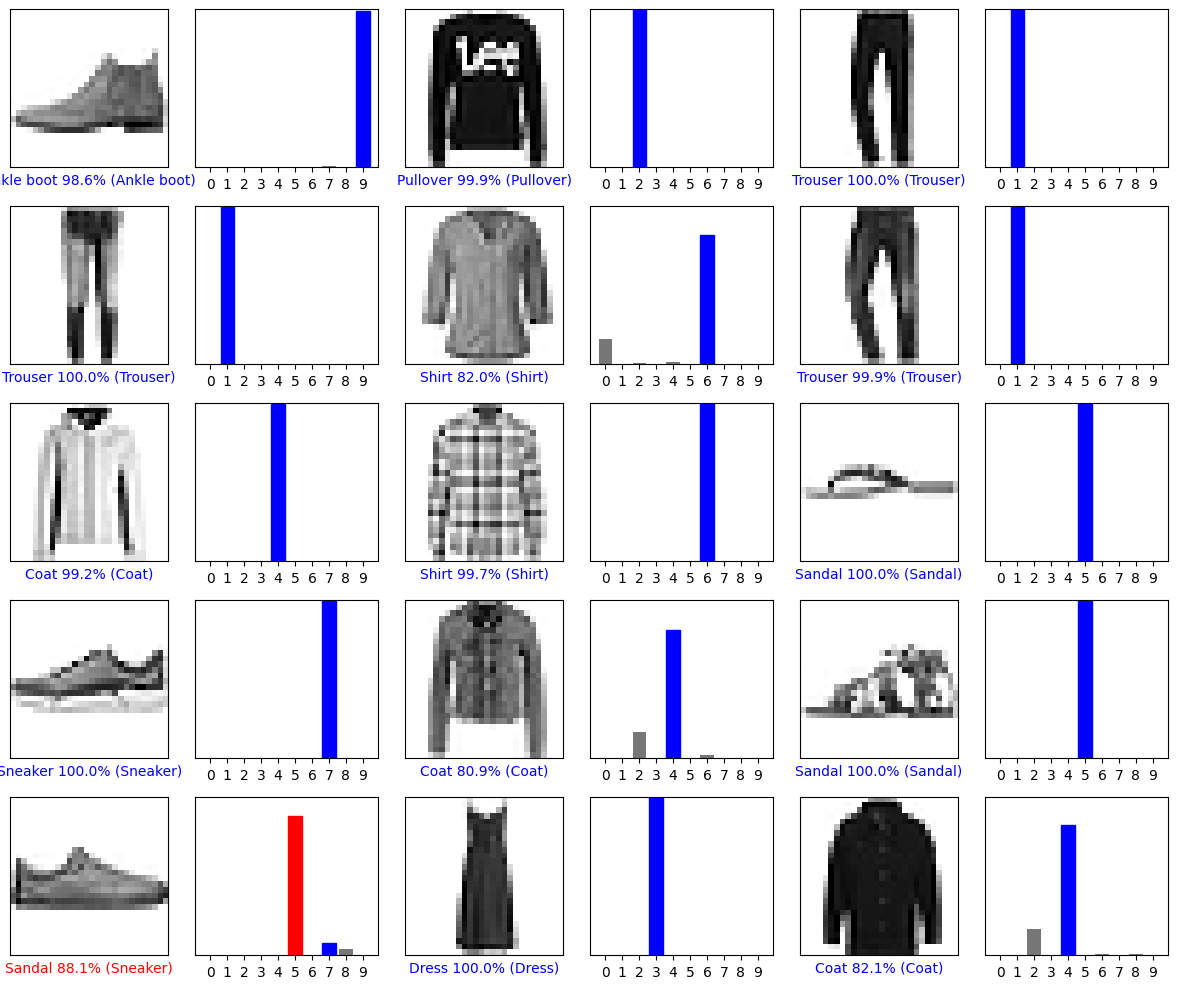

In [65]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [66]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [67]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [68]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 242ms/step
[[9.1725364e-05 3.7404758e-12 9.9892610e-01 1.5526643e-09 8.2623959e-04
  1.0369258e-14 1.5588093e-04 1.7861257e-15 9.2795256e-09 1.4216778e-09]]


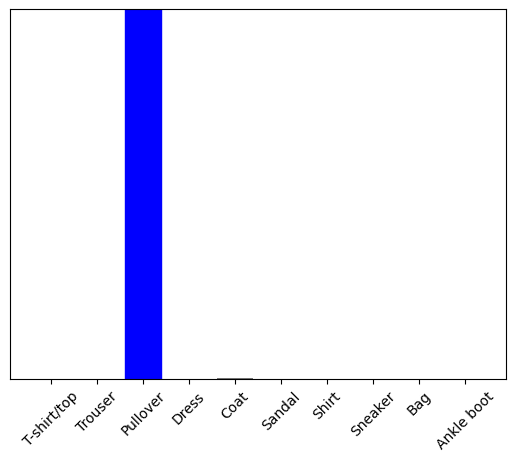

In [69]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [70]:
np.argmax(predictions_single[0])

2